# Example usage

First, lets generate some data from an AR process and plot it.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


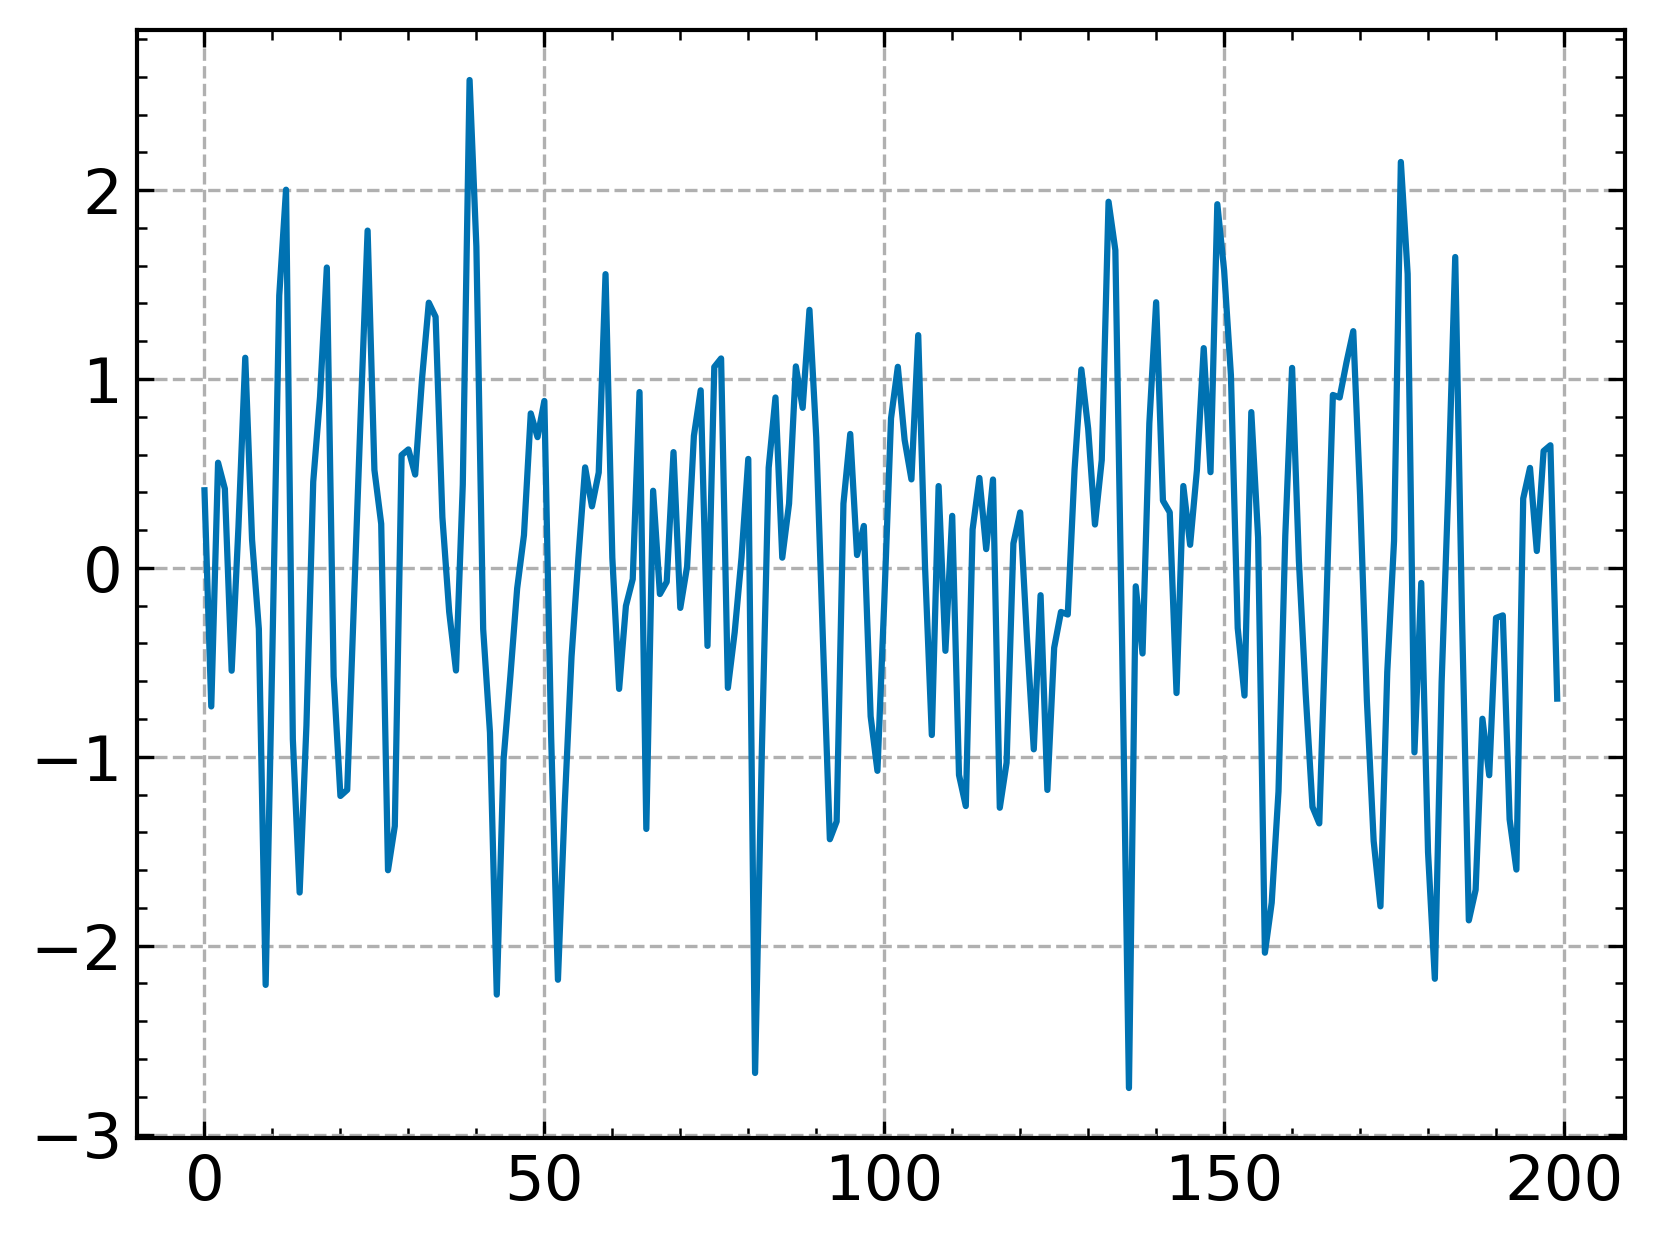

In [33]:
%matplotlib inline
%load_ext autoreload
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(1234)
ar = np.array([1, -.7, .4])
ma = np.array([1])
ar_simulater = ArmaProcess(ar, ma)
data = ar_simulater.generate_sample(nsample=200)
data = data - np.mean(data)
data = data / np.std(data)
plt.plot(data);

MCMC sampling:   0%|          | 0/2000 [00:00<?, ?it/s]

Generating PSD posterior:   0%|          | 0/1900 [00:00<?, ?it/s]

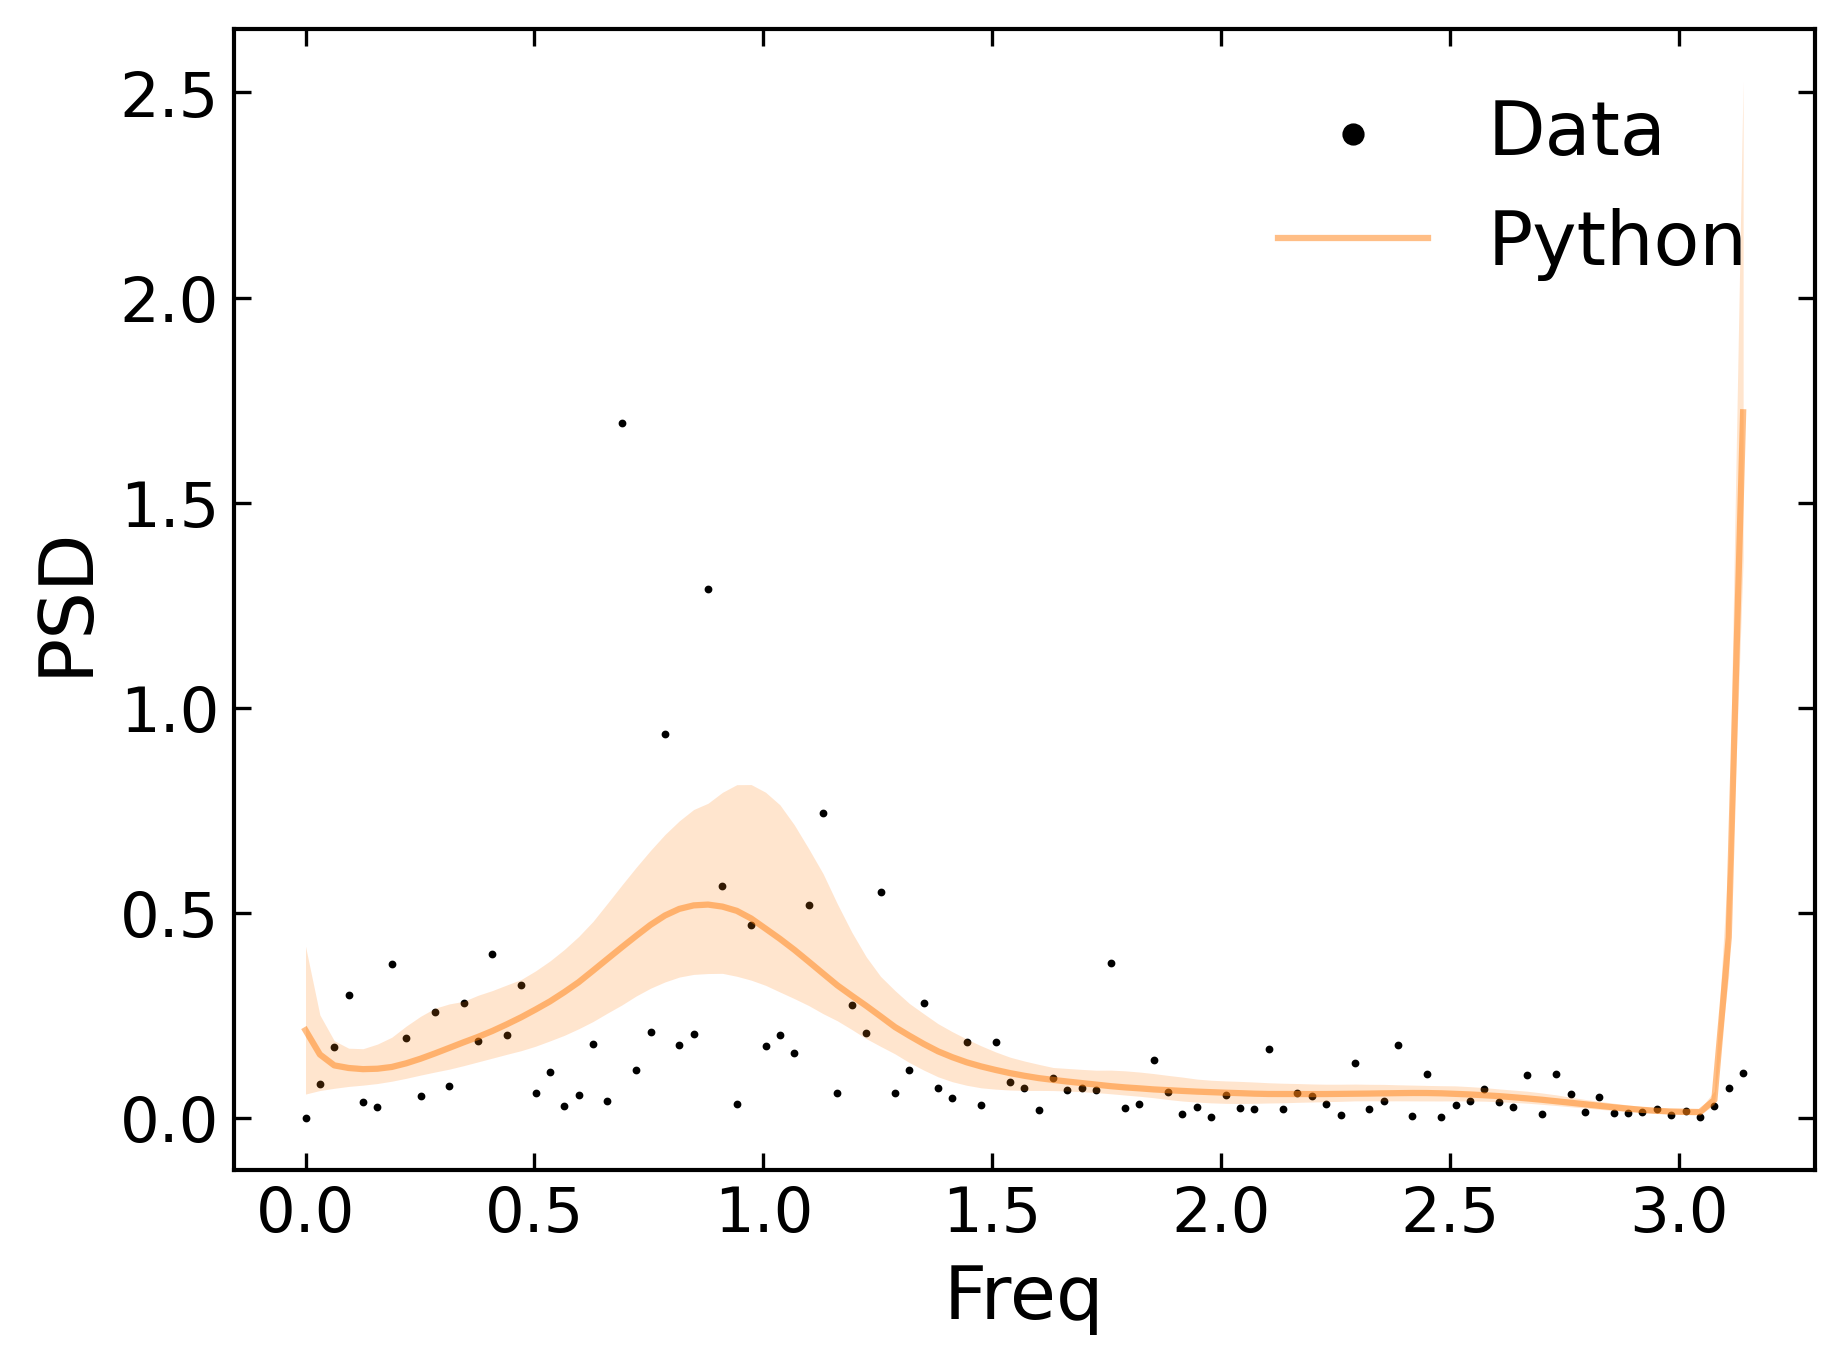

In [34]:
from pspline_psd.sample.gibbs_pspline_simple import gibbs_pspline_simple
from pspline_psd.plotting.plot_psd import plot_psd

mcmc = gibbs_pspline_simple(
data=data, Ntotal=2000, burnin=100, degree=3,
    eqSpacedKnots=True, compute_psds=True
)
fig = plot_psd(data, mcmc)
